In [1]:
import cv2
import os

faces_list = ['budanov', 'chmut', 'kim', 'marchenko', 'prytula', 'reznikov', 'zaluzhny', 'zelensky']
raw_images_path = os.path.join(os.getcwd(), 'data_set', 'raw_images')
cropped_images_path = os.path.join(os.getcwd(), 'data_set', 'cropped_images')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

for name in faces_list:
    raw_images_list = os.listdir(os.path.join(raw_images_path, name))
    counter = 1
    for raw in raw_images_list:
        img = cv2.imread(os.path.join(raw_images_path, name, raw))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            new_img = img[y:y+h, x:x+w]
            cv2.imwrite(os.path.join(cropped_images_path, name, f'{counter}.png'), new_img)
            counter += 1
        


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Activation, Flatten, Dropout, MaxPooling2D, Dense

import os
import cv2
import numpy as np

faces_list = ['budanov', 'chmut', 'kim', 'marchenko', 'prytula', 'reznikov', 'zaluzhny', 'zelensky']
cropped_images_path = os.path.join(os.getcwd(), 'data_set', 'cropped_images')

X = []
Y = []

for name in faces_list:
    path_to_name = os.path.join(cropped_images_path, name)
    lstdir = os.listdir(path_to_name)
    faces_prob = [0 if faces_list[i] != name else 1 for i in range(len(faces_list))]
    for pic in lstdir:
        path_to_pic = os.path.join(path_to_name, pic)
        img = cv2.imread(path_to_pic)
        img = cv2.resize(img, (32, 32))
        X.append(img)
        Y.append(faces_prob)

X = np.asarray(X, dtype='float32')
Y = np.asarray(Y, dtype='float32')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(32, (3, 3), input_shape=X[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), input_shape=X[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(len(faces_list), kernel_regularizer='l2'))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

c:\Users\Aleksandr\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [47]:
hist = model.fit(X, Y, epochs=32)

Epoch 1/32
13/13 [==============================] - 1s 15ms/step - loss: 26.3703 - accuracy: 0.1593
Epoch 2/32
13/13 [==============================] - 0s 12ms/step - loss: 4.5839 - accuracy: 0.1397
Epoch 3/32
13/13 [==============================] - 0s 4ms/step - loss: 2.8981 - accuracy: 0.1912
Epoch 4/32
13/13 [==============================] - 0s 4ms/step - loss: 2.2622 - accuracy: 0.2108
Epoch 5/32
13/13 [==============================] - 0s 4ms/step - loss: 2.3250 - accuracy: 0.2304
Epoch 6/32
13/13 [==============================] - 0s 4ms/step - loss: 2.5721 - accuracy: 0.1569
Epoch 7/32
13/13 [==============================] - 0s 4ms/step - loss: 2.2553 - accuracy: 0.1814
Epoch 8/32
13/13 [==============================] - 0s 4ms/step - loss: 2.2852 - accuracy: 0.2377
Epoch 9/32
13/13 [==============================] - 0s 5ms/step - loss: 2.1532 - accuracy: 0.2255
Epoch 10/32
13/13 [==============================] - 0s 4ms/step - loss: 2.2305 - accuracy: 0.2402
Epoch 11/32
13/1

In [4]:
print(X[0])

[[[147. 188. 211.]
  [164. 205. 228.]
  [165. 203. 228.]
  ...
  [145. 181. 211.]
  [118. 158. 187.]
  [146. 186. 212.]]

 [[154. 194. 221.]
  [170. 206. 230.]
  [180. 217. 242.]
  ...
  [126. 162. 192.]
  [118. 157. 186.]
  [141. 180. 207.]]

 [[138. 179. 207.]
  [145. 180. 206.]
  [167. 204. 230.]
  ...
  [110. 144. 174.]
  [126. 164. 192.]
  [118. 156. 182.]]

 ...

 [[ 27.  24.  26.]
  [ 23.  20.  22.]
  [ 18.  20.  19.]
  ...
  [ 16.  12.  13.]
  [ 24.  21.  22.]
  [ 38.  35.  37.]]

 [[ 30.  27.  29.]
  [ 26.  23.  25.]
  [ 24.  25.  26.]
  ...
  [ 30.  25.  26.]
  [ 33.  31.  31.]
  [ 37.  34.  35.]]

 [[ 31.  28.  30.]
  [ 26.  23.  25.]
  [ 24.  25.  26.]
  ...
  [ 13.  11.  11.]
  [ 36.  34.  34.]
  [ 38.  36.  37.]]]


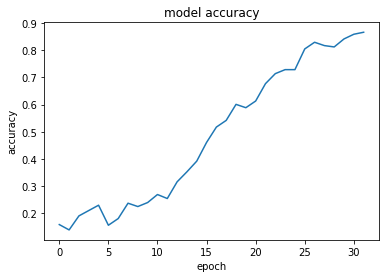

In [48]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [117]:
os.mkdir('.//model')

FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: './/model'

In [3]:
model.load_weights('.\\model\\vic_leaders_model.h5')

[[286  43 185 185]]


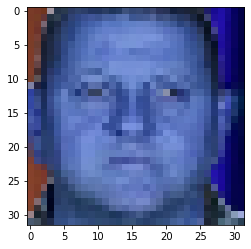

In [5]:
from matplotlib import pyplot as plt
test = cv2.imread('.\\test.webp')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(test, 1.3, 5)
print(faces)
x,y,w,h = faces[0]
new_test = test[y:y+h, x:x+w]
new_test = cv2.resize(new_test, (32, 32))
plt.imshow(new_test)

In [6]:
new_test = np.array([new_test])
new_test.shape

(1, 32, 32, 3)

In [49]:
pred = model.predict(new_test)
print(pred)
faces_list[np.argmax(pred)]

[[8.9514756e-01 1.1339659e-01 1.7860426e-04 7.3893982e-01 9.3101817e-01
  1.3927098e-01 9.7955346e-01 7.6346803e-01]]


'zaluzhny'